# Trabajo Especial - Modelos y Simulación

# Importaciones Generales

In [ ]:
from constants import *
import matplotlib.pyplot as plt
from MonteCarlo import MonteCarlo
from Utils import Utils
from rngs.Xorshift32 import Xorshift
from rngs.MersenneTwister import MersenneTwister
from rngs.LCG import LCG
from time import time

# Estimaciones

In [2]:
SEED = int(time())

#Instancias de los generadores
lcg = LCG(seed=SEED)
xorshift  = Xorshift(seed=SEED)
mersenne_twister = MersenneTwister(seed_value=SEED)

lcg_estimation = MonteCarlo.method(Nsamples=SAMPLE_SIZE_SMALL,
                                    g=Utils.gaussian_function,
                                    rng=lcg)

xorshift_estimation = MonteCarlo.method(Nsamples=SAMPLE_SIZE_SMALL,
                                        g=Utils.gaussian_function,
                                        rng=xorshift)


mersenne_twister_estimation = MonteCarlo.method(Nsamples=SAMPLE_SIZE_SMALL,
                                                g=Utils.gaussian_function,
                                                rng=mersenne_twister)

#Resultado Teórico
lcg_estimation = lcg_estimation ** TWO_DIMENSIONS
xorshift_estimation = xorshift_estimation ** TWO_DIMENSIONS
mersenne_twister_estimation = mersenne_twister_estimation ** TWO_DIMENSIONS

print(f"Estimación Generador Congruencial Lineal -> {lcg_estimation:.6f}")
print(f"Estimación XORSHIFT -> {xorshift_estimation:.6f}")
print(f"Estimación Mersenne Twister -> {mersenne_twister_estimation:.6f}")
print(f"Valor Real -> {INTEGRAL_VAL_D2:.6f}\n")

print(f"Error cuadratico de LCG -> {Utils.cuadratic_error(lcg_estimation, d=2):.6f}")
print(f"Error cuadratico de XORSHIFT -> {Utils.cuadratic_error(xorshift_estimation, d=2):.6f}")
print(f"Error cuadratico de MT -> {Utils.cuadratic_error(mersenne_twister_estimation, d=2):.6f}")

Estimación Generador Congruencial Lineal -> 0.562408
Estimación XORSHIFT -> 0.555282
Estimación Mersenne Twister -> 0.554336
Valor Real -> 0.557740

Error cuadratico de LCG -> 0.000022
Error cuadratico de XORSHIFT -> 0.000006
Error cuadratico de MT -> 0.000012


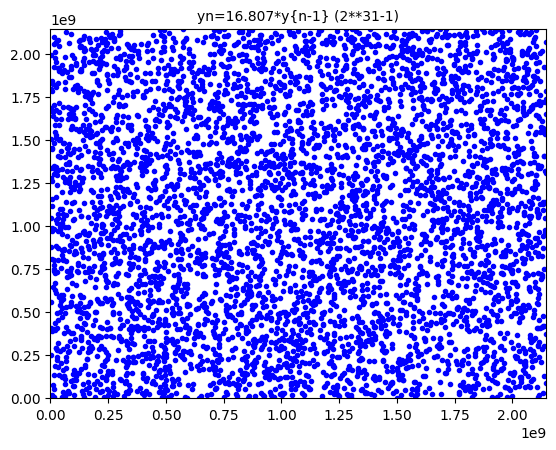

In [3]:
secuencia = []
N = 5000
for _ in range(N+1):
    val = lcg.next()
    secuencia.append(val)

plt.figure(1)
plt.title('yn=16.807*y{n-1} (2**31-1)', fontsize=10)
plt.axis([0,2**31-1,0,2**31-1])
plt.plot(secuencia[0:N], secuencia[1:N+1],'b.')

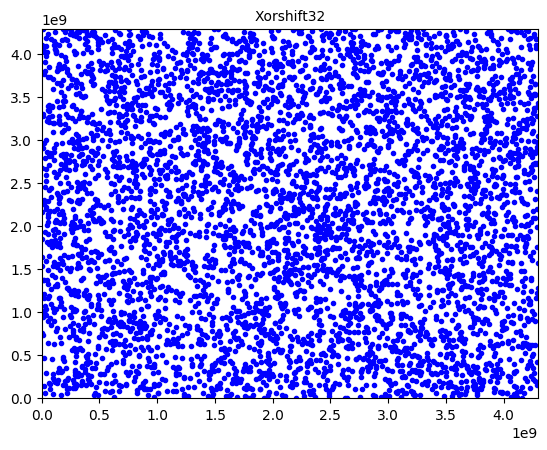

In [4]:
secuencia = []
N = 5000
for _ in range(N+1):
    val = xorshift.next()
    secuencia.append(val)

plt.figure(1)
plt.title('Xorshift32', fontsize=10)
plt.axis([0,2**32,0,2**32])
plt.plot(secuencia[0:N], secuencia[1:N+1],'b.')

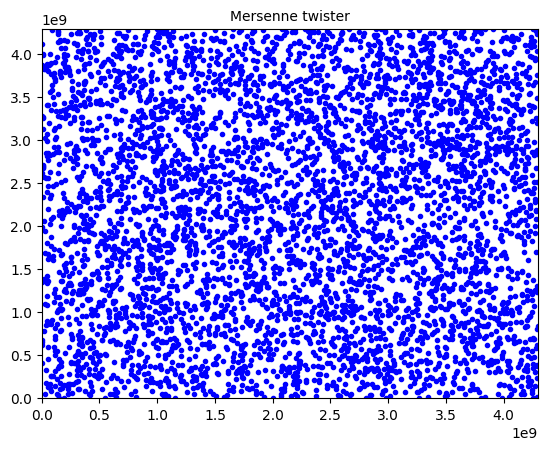

In [5]:
secuencia = []
N = 5000
for _ in range(N+1):
    val = mersenne_twister.next()
    secuencia.append(val)

plt.figure(1)
plt.title('Mersenne twister', fontsize=10)
plt.axis([0,2**32,0,2**32])
plt.plot(secuencia[0:N], secuencia[1:N+1],'b.')

In [6]:
print(f"LCG tarda: {lcg.time_next():.6f} miliseg")
print(f"XORSHIFT tarda: {xorshift.time_next():.6f} miliseg")
print(f"Mersenne_twister tarda: {mersenne_twister.time_next():.6f} miliseg")

LCG tarda: 0.003576 miliseg
XORSHIFT tarda: 0.005245 miliseg
Mersenne_twister tarda: 0.008106 miliseg
